## Duplicate Dataset Analysis Template

Authors: Sarah Perry, Daniel Perry

Write intro stuff here

In [28]:
import dupedat.simulated_dataset_gen.create_simulated_datasets as csd
import dupedat.simulated_dataset_gen.example_simulated_datasets as esd
import dupedat.method as methods
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
fp_df = input('\nInput data filepath\n\n')

KeyboardInterrupt: Interrupted by user

In [12]:
val = esd.true_value_distribution

In [14]:
outliers = True
outlier_frequency = 0.05 if outliers else 0
gaussian_error_distribution = csd.GaussianErrorDistribution(3, .07)
non_gaussian_error_distribution = csd.UniformValueIndependent(-25, 25) # homoscedastic
combined_error_distribution = csd.CombinedErrorDistribution(gaussian_error_distribution, non_gaussian_error_distribution, outlier_frequency)

true_value_distribution = csd.UniformTrueValue(0, 100)

data_set_distribution = csd.SimulatedDataset(combined_error_distribution,
                                   true_value_distribution,
                                   2,
                                   1000)
dataset = data_set_distribution.create_dataset()

<class 'dupedat.method.sd_models.RCSMethod'>


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regression.py:190: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\quantile_regressio

ModelParams(model_type=<ModelType.ABSOLUTE_RELATIVE: 3>, absolute_error_sd=absolute_error_sd, 3.5727331063433696, ConfidenceInterval(lower_bound=2.9645791475412606, upper_bound=3.9974453173002584, p_value=0.95), relative_error_sd=relative_error_sd, 0.06767732358413102, ConfidenceInterval(lower_bound=0.05394959682842353, upper_bound=0.08714006256663334, p_value=0.95))
~*~*~*~*~*~**~*~*~*~*~*~*~


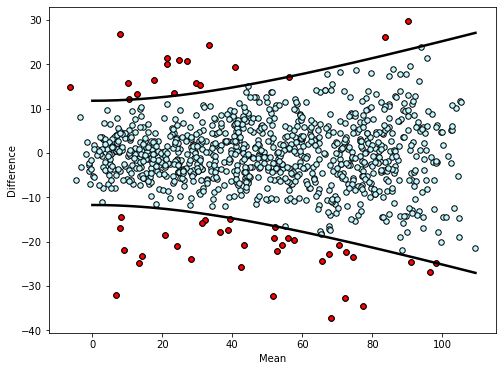

In [29]:
vm_list = [methods.sd_models.RCSMethod] # CSMethod, RCSMethod, RZMethod, ZMethod]  # HNMethod, RZMethod, SDMethod

duplicate_dataset = methods.sd_models.DuplicateDataset(dataset, 'replicate_1', 'replicate_2')

for method in vm_list:
    print(method)
    vm = method(duplicate_dataset, 0.95)
    print(vm.get_gaussian_sd_params())
    print('~*~*~*~*~*~**~*~*~*~*~*~*~')

    sdt_outlier = methods.outlier_detection.SDTMethod(vm)
    fig_outlier = sdt_outlier.display_outliers()

    plt.show(block=fig_outlier)